In [1]:
import numpy as np
from scipy.integrate import solve_ivp # initial value problem solver
%matplotlib inline
from matplotlib import pyplot as plt

onrate = 1e5
offrate = 10
reverserate = 1e-9

# dy/dt where y is the list of species
def derivative(t, y): # need arguments t, y in this order for scipy
    # unpacking y into individual species:
    c, kk, kkc, kckc, kckc286, kc286kc286, kkc286, k306kc, k306k, k306kc286, k306k306 = y
    # Now, all of the "right-hand sides," AKA the system of ODEs at the bottom of kineticmodel.pdf
    dc = -onrate*kk*c+offrate*kkc-onrate*kkc*c+offrate*kckc-onrate*kkc286*c+offrate*kckc286-onrate*k306k*c+offrate*k306kc
    dkk = -onrate*kk*c+offrate*kkc-ratecis306*kk+reverserate*k306k
    dkkc = onrate*kk*c-offrate*kkc-onrate*kkc*c+offrate*kckc-rate306*kkc+reverserate*k306kc-ratecis306*kkc+reverserate*k306kc
    dkckc = onrate*kkc*c-offrate*kckc-rate286*kckc+reverserate*kckc286
    dkckc286 = rate286*kckc-reverserate*kckc286-rate286*kckc286+reverserate*kc286kc286-offrate*kckc286+onrate*kkc286*c
    dkc286kc286 = rate286*kckc286-reverserate*kc286kc286
    dkkc286 = offrate*kckc286-onrate*kkc286*c-rate306*kkc286+reverserate*k306kc286-ratecis306*kkc286+reverserate*k306kc286
    dk306kc = rate306*kkc-reverserate*k306kc-offrate*k306kc+onrate*k306k*c+ratecis306*kkc-reverserate*k306kc
    dk306k = offrate*k306kc-onrate*k306k*c+ratecis306*kk-reverserate*k306k-ratecis306*k306k+reverserate*k306k306
    dk306kc286 = rate306*kkc286-reverserate*k306kc286+ratecis306*kkc286-reverserate*k306kc286
    dk306k306 = ratecis306*k306k-reverserate*k306k306
    return [dc, dkk, dkkc, dkckc, dkckc286, dkc286kc286, dkkc286, dk306kc, dk306k, dk306kc286, dk306k306]

# initial conditions
y0 = np.zeros(11)
y0[0] = 1e-4 # initial molarity of CaM
y0[1] = 1e-9 # initial molarity of CaMKII

# 10000 points evenly spaced between 0 and 200 to sample the solution at:
t_eval = np.linspace(0, 200, 10000)

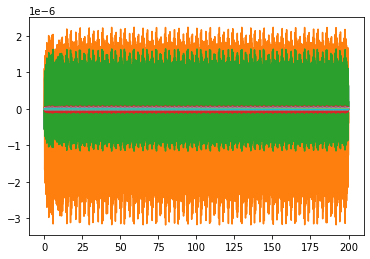

In [2]:
# Parameter set 1
rate286 = 1
rate306 = 0.1
ratecis306 = 0.1

solution1 = solve_ivp(derivative, (0, 200), y0, t_eval = t_eval)
plt.plot(solution1.t, solution1.y[1:].T)

# Numerical oscillations result from the default RK45 method

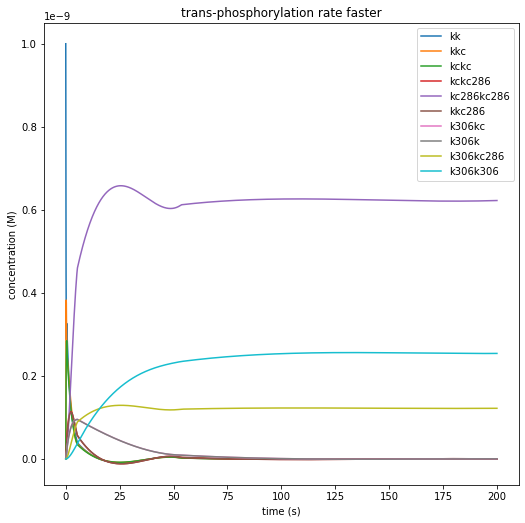

In [3]:
# Need to switch to an implicit solver for this "stiff" problem
solution1 = solve_ivp(derivative, (0, 200), y0, t_eval = t_eval, method = 'Radau')
plt.figure(figsize=(8.5, 8.5))
plt.plot(solution1.t, solution1.y[1:].T)
plt.title("trans-phosphorylation rate faster")
plt.xlabel("time (s)")
plt.ylabel("concentration (M)")
plt.legend(["kk","kkc","kckc","kckc286", "kc286kc286", "kkc286", "k306kc", "k306k", "k306kc286", "k306k306"])

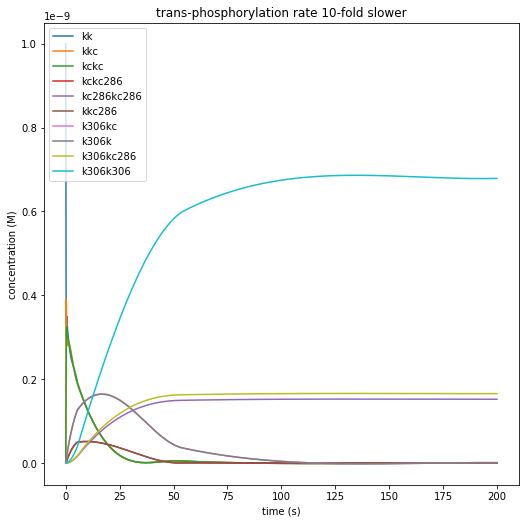

In [4]:
# Parameter set 2
rate286 = 0.1
rate306 = 0.01
ratecis306 = 0.1

solution2 = solve_ivp(derivative, (0, 200), y0, t_eval = t_eval, method = 'Radau')
plt.figure(figsize=(8.5, 8.5))
plt.plot(solution2.t, solution2.y[1:].T)
plt.title("trans-phosphorylation rate 10-fold slower")
plt.xlabel("time (s)")
plt.ylabel("concentration (M)")
plt.legend(["kk","kkc","kckc","kckc286", "kc286kc286", "kkc286", "k306kc", "k306k", "k306kc286", "k306k306"])